<a href="https://colab.research.google.com/github/0xPriyanshuJha/NeuralStyleTransfer/blob/main/NeuralStyleTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0. Import Dependencies and Pretrained Model

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = hub.load("https://www.kaggle.com/models/google/arbitrary-image-stylization-v1/frameworks/TensorFlow1/variations/256/versions/2")

##1. Preprocess Image and Load

In [5]:
def load_image(img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = img[tf.newaxis, :]
  return img

In [14]:
content_img = load_image('/content/cat.png')
style_img = load_image('/content/images.jpeg')

##3. Visualize Output

In [9]:
content_img.shape

TensorShape([1, 716, 710, 3])

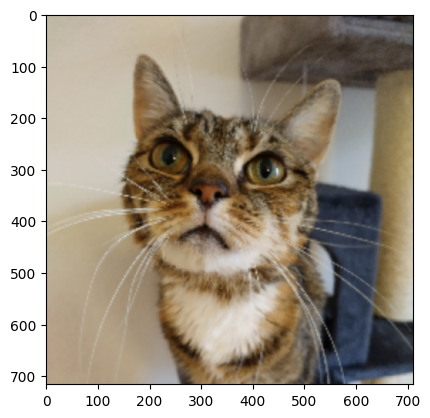

In [8]:
plt.imshow(np.squeeze(content_img))

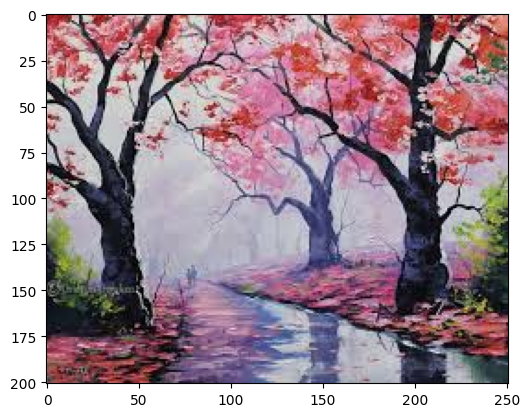

In [15]:
plt.imshow(np.squeeze(style_img))

##3.Stylize Image

In [16]:
stylized_image = model(tf.constant(content_img), tf.constant(style_img))[0]

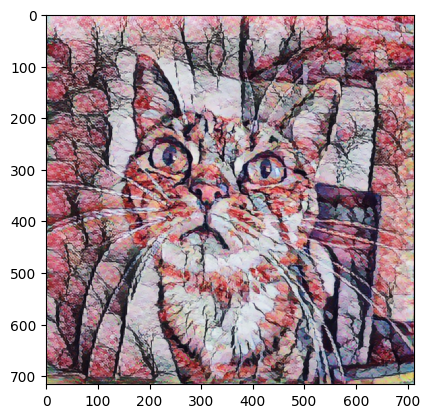

In [17]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [18]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True